## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
```
Regression predicts a quantitative value, whereas classification predicts a categorical label.
```
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
```
It's a table that compares the predicted labels against the true labels. It helps us understand what types of mistakes a model makes, and trends like whether it's biased towards one class or another.
```
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
```
Accuracy is the proportion of correct predictions. It may not be enough to evaluate a classifier's predictive performance because if the dataset is imbalanced, it's impossible to tell that based on the accuracy metric alone.
```
4. What does the root mean squared error quantify about a particular model?
```
The root mean squared error quantifies how far predictions are from the true values on average.
```
5. What are overfitting and underfitting?
```
Overfitting is when the model gets too good on the training data, and thus its weights are optimized for the training dataset and will do amazing on that, but poorly on other datasets. Underfitting is when the model is just too simple and cannot capture real patterns in the data, being bad at both the training dataset and the real datasets.
```
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
```
Splitting the data helps to evaluate whether the model can generalize beyond the data it learned from. Choosing k helps to reduce overfitting by preventing the model from tuning only to noise from training data.
```
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
```
With a prediction, it's simple and better when a definite decision has to be made. However, it loses uncertainty information, and a 51% and 99% classification is the same.

With a probability distribution, you capture that uncertainty, and allow for flexible decisions to be made, but it's much harder to interpret directly.
```

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [1]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


Download complete
Extracting data files...
Data extracted


    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1

Data Types:
voltage      float64
height       float64
soil         float64
mine_type      int64
dtype: object

Stats:
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000

Mine Types:
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64

Feature Correlations:
          voltage    height      soil
voltage  1.

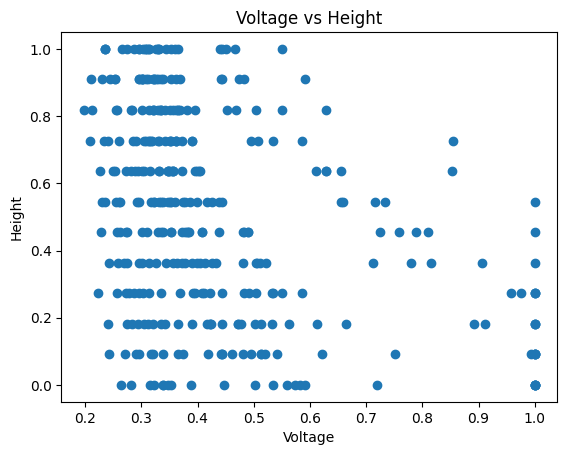

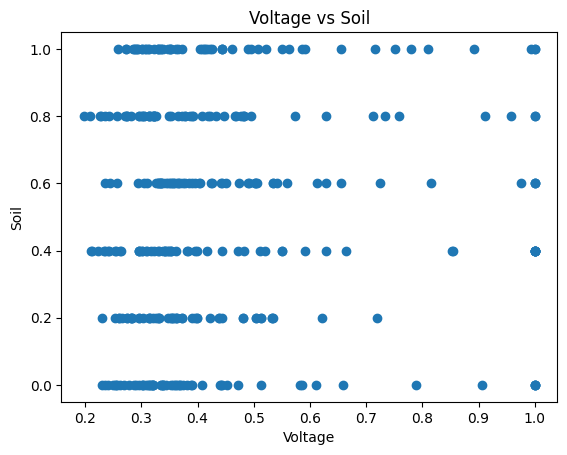

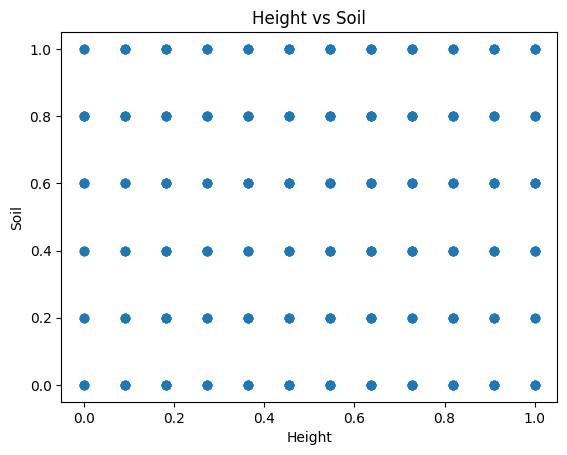

In [4]:
# QUESTION 2.1
import os
import pandas as pd
import matplotlib.pyplot as plt
data_dir = './data'
csv_path = os.path.join(data_dir, "land_mines.csv")
df = pd.read_csv(csv_path)

print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nStats:")
print(df.describe())
print("\nMine Types:")
print(df["mine_type"].value_counts().sort_index())
print("\nFeature Correlations:")
print(df[["voltage","height","soil"]].corr())

plt.figure()
plt.scatter(df["voltage"], df["height"])
plt.xlabel("Voltage")
plt.ylabel("Height")
plt.title("Voltage vs Height")
plt.show()

plt.figure()
plt.scatter(df["voltage"], df["soil"])
plt.xlabel("Voltage")
plt.ylabel("Soil")
plt.title("Voltage vs Soil")
plt.show()

plt.figure()
plt.scatter(df["height"], df["soil"])
plt.xlabel("Height")
plt.ylabel("Soil")
plt.title("Height vs Soil")
plt.show()

In [6]:
# QUESTION 2.2
from sklearn.model_selection import train_test_split
X = df[["voltage","height","soil"]]
y = df["mine_type"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5,random_state=42,stratify=y)
print("Training Class:")
print(y_train.value_counts().sort_index())
print("\nTesting Class:")
print(y_test.value_counts().sort_index())

Training Class:
mine_type
1    35
2    35
3    33
4    33
5    33
Name: count, dtype: int64

Testing Class:
mine_type
1    36
2    35
3    33
4    33
5    32
Name: count, dtype: int64


In [8]:
# QUESTION 2.3
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = list(range(1,21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

print("Accuracy by k:")
for k, a in zip(k_values, accuracies):
    print(f"k={k} accuracy={a:.4f}")

best_k = k_values[int(np.argmax(accuracies))]
print("\nBest k =", best_k)
print("I evaluated K values from a range of 1-20, and I selected the k value with the highest test accuracy after being trained on the training data.")

Accuracy by k:
k=1 accuracy=0.4024
k=2 accuracy=0.4379
k=3 accuracy=0.3787
k=4 accuracy=0.3550
k=5 accuracy=0.3136
k=6 accuracy=0.3254
k=7 accuracy=0.3136
k=8 accuracy=0.3136
k=9 accuracy=0.3491
k=10 accuracy=0.3373
k=11 accuracy=0.3550
k=12 accuracy=0.3373
k=13 accuracy=0.3491
k=14 accuracy=0.3136
k=15 accuracy=0.3314
k=16 accuracy=0.3432
k=17 accuracy=0.3609
k=18 accuracy=0.3373
k=19 accuracy=0.3373
k=20 accuracy=0.3432

Best k = 2
I evaluated K values from a range of 1-20, and I selected the k value with the highest test accuracy after being trained on the training data.


In [10]:
# QUESTION 2.4
from sklearn.metrics import confusion_matrix
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm,
    index=[f"actual_{c}" for c in labels],
    columns=[f"pred_{c}" for c in labels]
)
print("\nConfusion Matrix:")
print(cm_df)

row_totals = cm.sum(axis=1)
per_class_accuracy = np.diag(cm) / row_totals
performance = pd.DataFrame({
    "mine_type": labels,
    "test_samples": row_totals,
    "correct_predictions": np.diag(cm),
    "per_class_accuracy": per_class_accuracy
})
print("\n Accuracy per class:")
print(performance)
print("As we can see here, it's more accurate on classes 1 and 2, but drops severely on classes 3 4 and 5.")

Accuracy: 0.4378698224852071

Confusion Matrix:
          pred_1  pred_2  pred_3  pred_4  pred_5
actual_1      25       0       6       4       1
actual_2       0      32       0       3       0
actual_3      12       2       9       6       4
actual_4      12       5       8       8       0
actual_5      15       2      10       5       0

 Accuracy per class:
   mine_type  test_samples  correct_predictions  per_class_accuracy
0          1            36                   25            0.694444
1          2            35                   32            0.914286
2          3            33                    9            0.272727
3          4            33                    8            0.242424
4          5            32                    0            0.000000
As we can see here, it's more accurate on classes 1 and 2, but drops severely on classes 3 4 and 5.


**Question 2.5:** \
Given the error that this model tends to make, I would advise to use it as a decision supporter rather than a decision maker. The predictions that the model makes should be guiding investigation or be treated as clues towards a direction rather than being a conclusive result.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [12]:
# QUESTION 3.1
import os
import pandas as pd

data_dir = "./data"
csv_path = os.path.join(data_dir, "USA_cars_datasets.csv")
df = pd.read_csv(csv_path)
df = df[["price", "year", "mileage"]]
print("Head:")
print(df.head())
print("\nDimensions:")
print(df.shape)
print("\nMissing Values (none seem to be present)")
print(df.isna().sum())
df = df.dropna()
print("\nDimensions after NA removal:")
print(df.shape)

Head:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Dimensions:
(2499, 3)

Missing Values (none seem to be present)
price      0
year       0
mileage    0
dtype: int64

Dimensions after NA removal:
(2499, 3)


In [13]:
# QUESTION 3.2
df["year_norm"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())
df["mileage_norm"] = (df["mileage"] - df["mileage"].min()) / (df["mileage"].max() - df["mileage"].min())
print(df.head())

   price  year  mileage  year_norm  mileage_norm
0   6300  2008   274117   0.744681      0.269287
1   2899  2011   190552   0.808511      0.187194
2   5350  2018    39590   0.957447      0.038892
3  25000  2014    64146   0.872340      0.063016
4  27700  2018     6654   0.957447      0.006537


In [14]:
# QUESTION 3.3
from sklearn.model_selection import train_test_split
X = df[["year_norm", "mileage_norm"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (1999, 2)
Testing size: (500, 2)


k=3 MSE=148065935.52


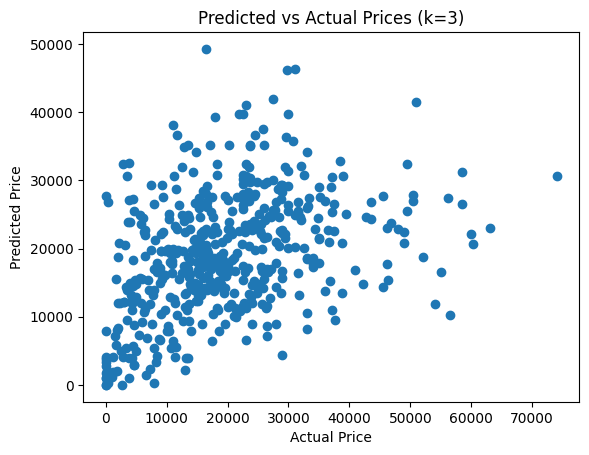

k=10 MSE=117399126.11


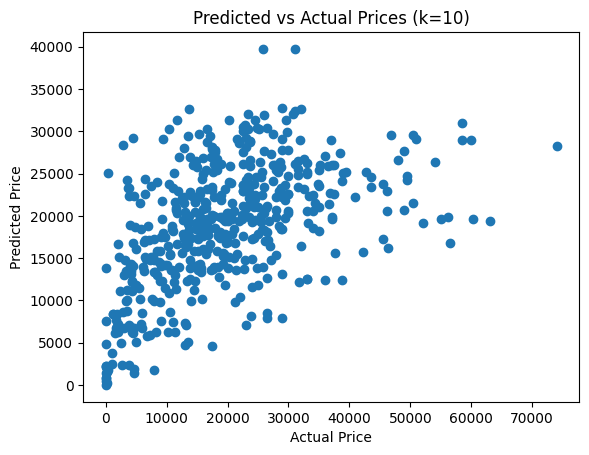

k=25 MSE=112576160.82


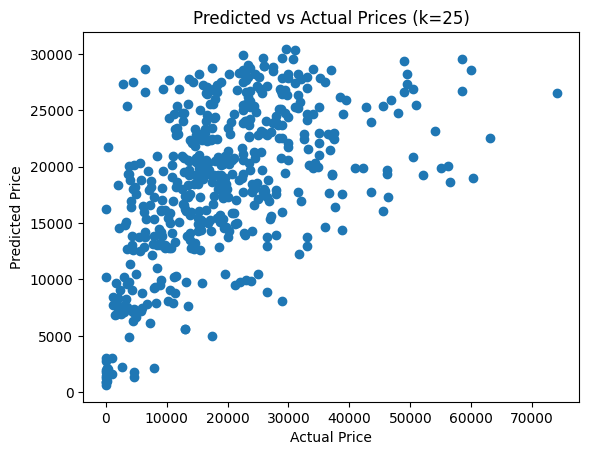

k=50 MSE=110202549.30


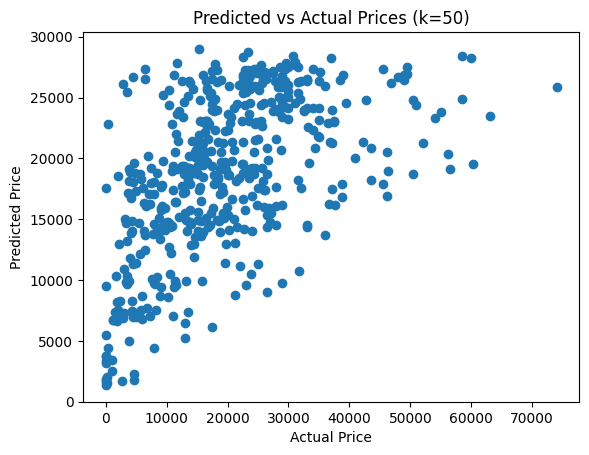

k=100 MSE=112253932.82


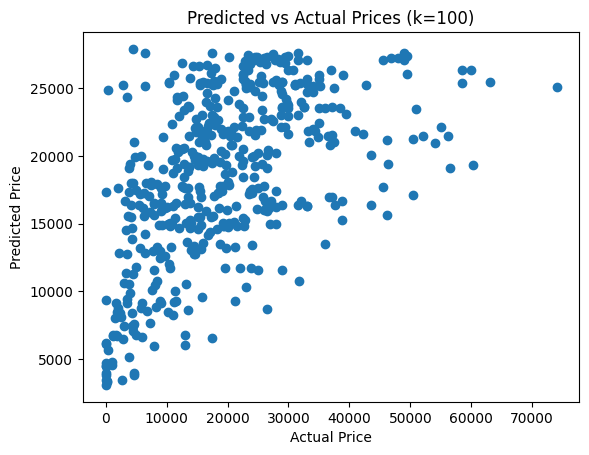

k=300 MSE=114496301.83


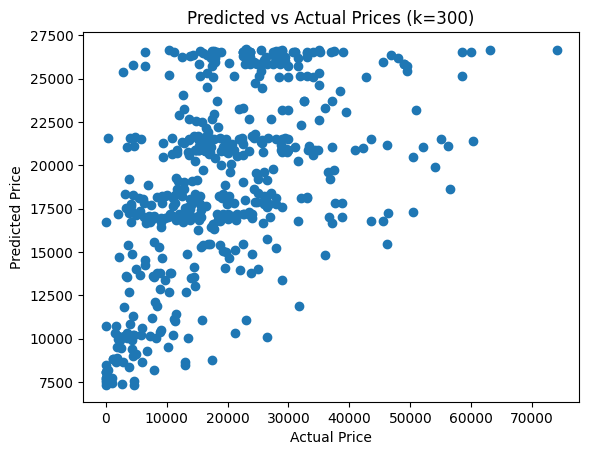

As k increases, the predictions become smoother and less variable. The predictions shift from the noisy ones at lower k to the overly averaged predictions at higher k.


In [18]:
# QUESTION 3.4
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3,10,25,50,100,300]
mse_results = {}
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_results[k] = mse
    print(f"k={k} MSE={mse:.2f}")

    plt.figure()
    plt.scatter(y_test, preds)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Predicted vs Actual Prices (k={k})")
    plt.show()

print("As k increases, the predictions become smoother and less variable. The predictions shift from the noisy ones at lower k to the overly averaged predictions at higher k.")

In [17]:
# QUESTION 3.5:
best_k = min(mse_results, key=mse_results.get)
print("Optimal k:", best_k)

Optimal k: 50


**Question 3.6:** \
When k is small, the results suggest that there is overfitting due to the model capturing too much of the training noise. As k increases, predictions become smoother as they average across more neighbors, and thus the scatterplots compress more towards the center and signify less overfitting is happening. At very large values of k, you begin to see underfitting, as predictions cluster around the average price regardless of features.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [33]:
# QUESTION 6.1:
import pandas as pd
data_dir = "./data"
csv_path = os.path.join(data_dir, "airbnb_hw.csv")
df = pd.read_csv(csv_path)
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]
print("Head:")
print(df.head())
print("\nShape:")
print(df.shape)

Head:
   Review Scores Rating Price  Beds
0                   NaN   145   1.0
1                   NaN    37   1.0
2                   NaN    28   1.0
3                   NaN   199   3.0
4                  96.0   549   3.0

Shape:
(30478, 3)


In [34]:
# QUESTION 6.2:
missing_reviews = df.loc[df["Review Scores Rating"].isnull()].copy()
print("Missing review rows:")
print(missing_reviews.shape)

Missing review rows:
(8323, 3)


In [45]:
# fix question 4 error (assisted with GPT 5.2):
import numpy as np
import pandas as pd
df["Price"] = (
    df["Price"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace("$", "", regex=False)
    .str.strip()
)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Beds"] = pd.to_numeric(df["Beds"], errors="coerce")
df["Review Scores Rating"] = pd.to_numeric(df["Review Scores Rating"], errors="coerce")

In [36]:
# QUESTION 6.3:
df_complete = df.dropna(axis=0, how="any")

In [54]:
# QUESTION 6.4:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
X = df_complete.loc[:, ["Price","Beds"]]
y = df_complete["Review Scores Rating"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape)

k_values = [3,5,10,25,50,100,200]
sse_results = {}
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    sse = np.sum((y_test - predictions)**2)
    sse_results[k] = sse
    print(f"k={k} SSE={sse:.2f}")
best_k = min(sse_results, key=sse_results.get)
print("\nBest k =", best_k)
print("k is chosen based on the minimal sse")

(17688, 2) (4423, 2)
k=3 SSE=484154.00
k=5 SSE=400618.24
k=10 SSE=350583.52
k=25 SSE=326850.28
k=50 SSE=321081.58
k=100 SSE=317385.44
k=200 SSE=317489.88

Best k = 100
k is chosen based on the minimal sse


In [58]:
# QUESTION 6.5
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
best_model = KNeighborsRegressor(n_neighbors=best_k)
best_model.fit(X, y)

# Build + clean X_missing (chatGPT assisted)
X_missing = missing_reviews.loc[:, ["Price", "Beds"]].copy()
X_missing["Price"] = (
    X_missing["Price"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace("$", "", regex=False)
    .str.strip()
)
X_missing["Price"] = pd.to_numeric(X_missing["Price"], errors="coerce")
X_missing["Beds"] = pd.to_numeric(X_missing["Beds"], errors="coerce")
X_missing_ok = X_missing.dropna(axis=0, how="any")

predictions = best_model.predict(X_missing_ok)
missing_reviews["Predicted Rating"] = np.nan
missing_reviews.loc[X_missing_ok.index, "Predicted Rating"] = predictions
missing_reviews.head()

,Review Scores Rating,Price,Beds,Predicted Rating
0,NaN,145,1.0,94.06
1,NaN,37,1.0,87.88
2,NaN,28,1.0,86.19
3,NaN,199,3.0,90.04
13,NaN,68,1.0,90.07


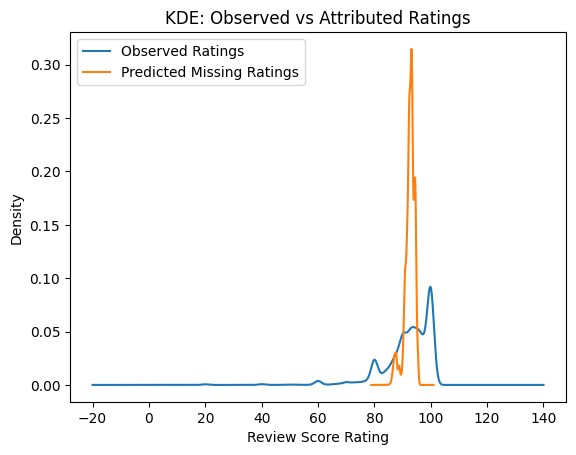

They are kind of similar, but at the same time they are not. The attributed ratings are much more concentrated around the average rating compared to the observed rating, and generally just have lower spread.


In [57]:
import matplotlib.pyplot as plt

plt.figure()
y.plot(kind="kde",label="Observed Ratings")
missing_reviews["Predicted Rating"].plot(kind="kde",label="Predicted Missing Ratings")
plt.xlabel("Review Score Rating")
plt.title("KDE: Observed vs Attributed Ratings")
plt.legend()
plt.show()

print("They are kind of similar, but at the same time they are not. The attributed ratings are much more concentrated around the average rating compared to the observed rating, and generally just have lower spread.")

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)